<a href="https://colab.research.google.com/github/RadhakrishnanPSG/AlgoPrime/blob/main/AlgoPrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Telecommunication Users

## About the Dataset

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
1 - Basic Service, 2 - E-Service, 3 - Plus Service, 4 - Total Service

## Objective

The objective of the project is to build a classifier that predicts unknown cases. Classification algorithms used are K-Nearest Neighbours, Logistic Regression, Decision Trees, and Support Vector Machines. The optimum classifier will be found based on the best accuracy. 

## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Data

In [ ]:
df = pd.read_csv("/content/Telecust1.csv")

In [ ]:
df.head(10)

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
5,2,41,39,78,0,17,2,16,0,1,1,C
6,3,45,22,19,1,2,2,4,0,1,5,B
7,2,38,35,76,0,5,2,10,0,0,3,D
8,3,45,59,166,1,7,4,31,0,0,5,C
9,1,68,41,72,1,21,1,22,0,0,3,B


In [ ]:
df.isnull().sum() 

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
df.isna().sum() #very clean data :)

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
#Count of each category
df['custcat'].value_counts()

C    281
A    266
D    236
B    217
Name: custcat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


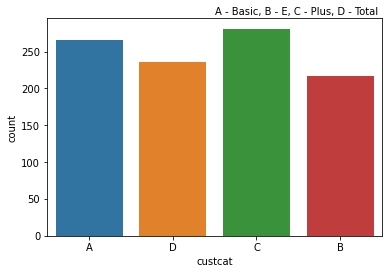

In [ ]:
ax = sns.countplot(df.custcat)
plt.text(1.5,300,'A - Basic, B - E, C - Plus, D - Total')
plt.show()

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


## Exploring Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe389f59a10>]],
      dtype=object)

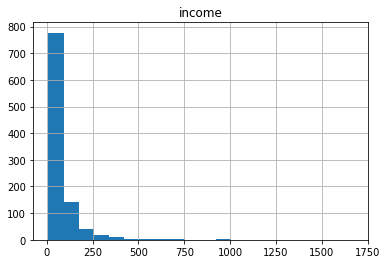

In [ ]:
#Spread of income
df.hist(column='income', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


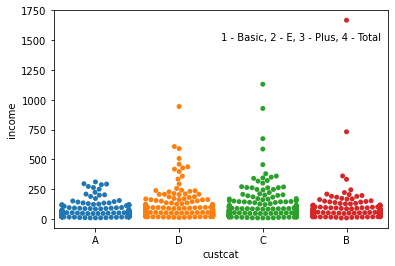

In [ ]:
ax = sns.swarmplot(x = 'custcat', y='income', data =df)
plt.text(1.5,1500,'A - Basic, B - E, C - Plus, D - Total')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe389e3a290>]],
      dtype=object)

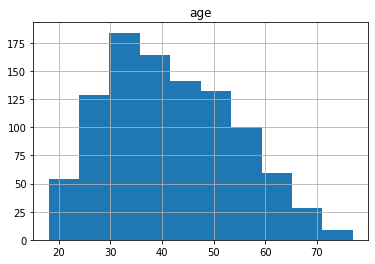

In [ ]:
#spread of age
df.hist(column='age', bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


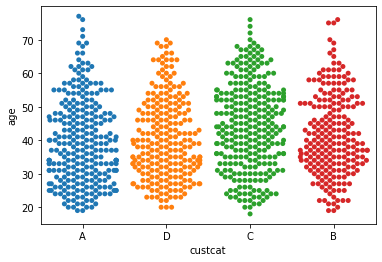

In [ ]:
sns.swarmplot(x = 'custcat', y='age', data =df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


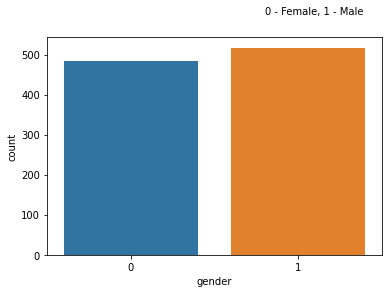

In [ ]:
ax = sns.countplot(df.gender)
plt.text(0.8,600,'0 - Female, 1 - Male')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


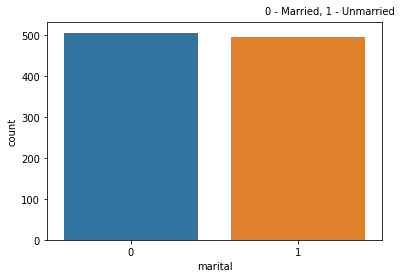

In [ ]:
sns.countplot(df.marital)
plt.text(0.8,550,'0 - Married, 1 - Unmarried')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


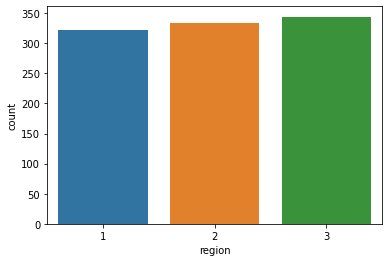

In [ ]:
sns.countplot(df.region)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe385b24310>]],
      dtype=object)

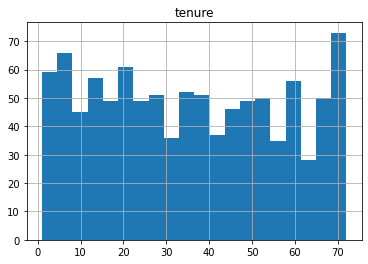

In [ ]:
df.hist(column='tenure', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


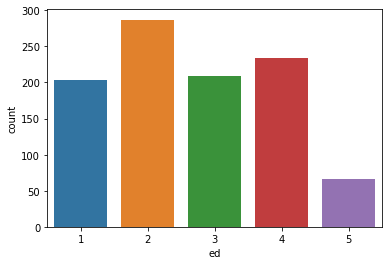

In [ ]:
sns.countplot(df.ed)

## Feature Set

In [ ]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
y = df['custcat'].values

In [ ]:
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]])

In [ ]:
y[0:5]

array(['A', 'D', 'C', 'A', 'C'], dtype=object)

## Normalization

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split

In [ ]:
#80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification
### K Nearest Neighbours

#### Model

In [ ]:
# First for k = 4
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['A', 'A', 'B', 'A', 'A'], dtype=object)

#### Accuracy

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.41375
Test set Accuracy:  0.46


In [ ]:
# For various values of k
max_k = 40
accuracies = np.zeros((max_k - 3))
for n in range(3,max_k):    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    accuracies[n-3] = metrics.accuracy_score(y_test, yhat)
accuracies

array([0.3  , 0.365, 0.36 , 0.36 , 0.345, 0.32 , 0.335, 0.33 , 0.34 ,
       0.345, 0.35 , 0.375, 0.39 , 0.385, 0.41 , 0.415, 0.395, 0.405,
       0.43 , 0.445, 0.45 , 0.435, 0.43 , 0.44 , 0.445, 0.425, 0.435,
       0.42 , 0.425, 0.415, 0.41 , 0.425, 0.44 , 0.43 , 0.42 , 0.45 ,
       0.46 ])

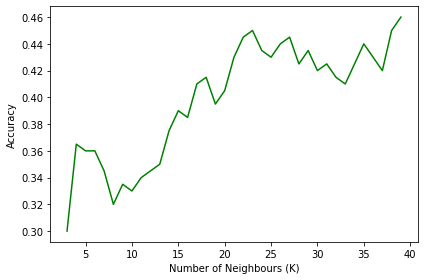

In [ ]:
plt.plot(range(3,max_k),accuracies,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

We see that in general we have an improve in accuracy with higher k. The best accuracy we have gotten is 0.46 with k=39

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 39).fit(X_train,y_train)
yhat=neigh.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, yhat)
knn_accuracy

0.46

#### Precision and Recall

In [ ]:
precision = metrics.precision_score(y_test, yhat, average = None)
precision


array([0.5       , 0.46153846, 0.42857143, 0.425     ])

In [ ]:
recall = metrics.recall_score(y_test, yhat, average = None)
recall

array([0.61904762, 0.32432432, 0.46153846, 0.35416667])

#### Confusion Matrix

In [ ]:
confusion_mat = metrics.confusion_matrix(y_test,yhat)
confusion_mat

array([[39,  2, 11, 11],
       [ 8, 12, 11,  6],
       [16,  6, 24,  6],
       [15,  6, 10, 17]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


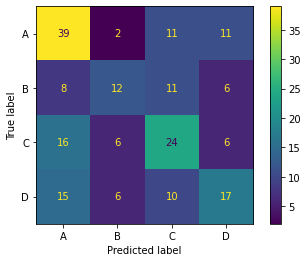

In [ ]:
metrics.plot_confusion_matrix(neigh, X_test,y_test)

### Logistic Regression

#### Model

In [ ]:
LR = LogisticRegression(C=1.0).fit(X_train,y_train)

In [ ]:
yhat = LR.predict(X_test)

In [ ]:
yhat[0:10]

array(['B', 'A', 'B', 'D', 'C', 'B', 'A', 'C', 'A', 'C'], dtype=object)

#### Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_test, yhat)
accuracy

0.445

In [ ]:
# For various values of C
accuracies = np.zeros(10)
for i in range(1,11):
   LR = LogisticRegression(C = 0.1*i).fit(X_train, y_train)
   yhat = LR.predict(X_test)
   accuracies[i-1] = metrics.accuracy_score(y_test, yhat)
accuracies

array([0.455, 0.45 , 0.45 , 0.45 , 0.45 , 0.45 , 0.445, 0.445, 0.445,
       0.445])

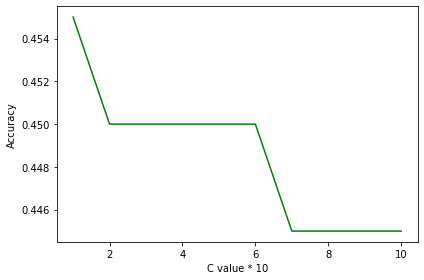

In [ ]:
plt.plot(range(1,11),accuracies,'g')
plt.ylabel('Accuracy')
plt.xlabel('C value * 10')
plt.tight_layout()
plt.show()

We have almost the same accuracy score for different C values, highest being 0.455

In [ ]:
LR_accuracy = max(accuracies)

#### Precision and Recall

In [ ]:
precision = metrics.precision_score(y_test, yhat, average = None)
precision

array([0.5       , 0.38888889, 0.38461538, 0.48      ])

In [ ]:
recall = metrics.recall_score(y_test, yhat, average = None)
recall

array([0.49206349, 0.37837838, 0.38461538, 0.5       ])

#### Confusion Matrix

In [ ]:
confusion_mat = metrics.confusion_matrix(y_test,yhat)
confusion_mat

array([[31,  3, 15, 14],
       [ 7, 14,  9,  7],
       [19,  8, 20,  5],
       [ 5, 11,  8, 24]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


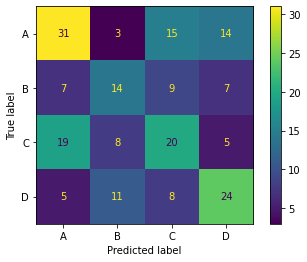

In [ ]:
metrics.plot_confusion_matrix(LR,X_test,y_test)

### Decision Tree

#### Model

In [ ]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train, y_train)

In [ ]:
yhat = decTree.predict(X_test)
yhat[0:10]

array(['B', 'A', 'B', 'D', 'C', 'C', 'A', 'A', 'A', 'C'], dtype=object)

In [ ]:
from sklearn import tree
%matplotlib inline 

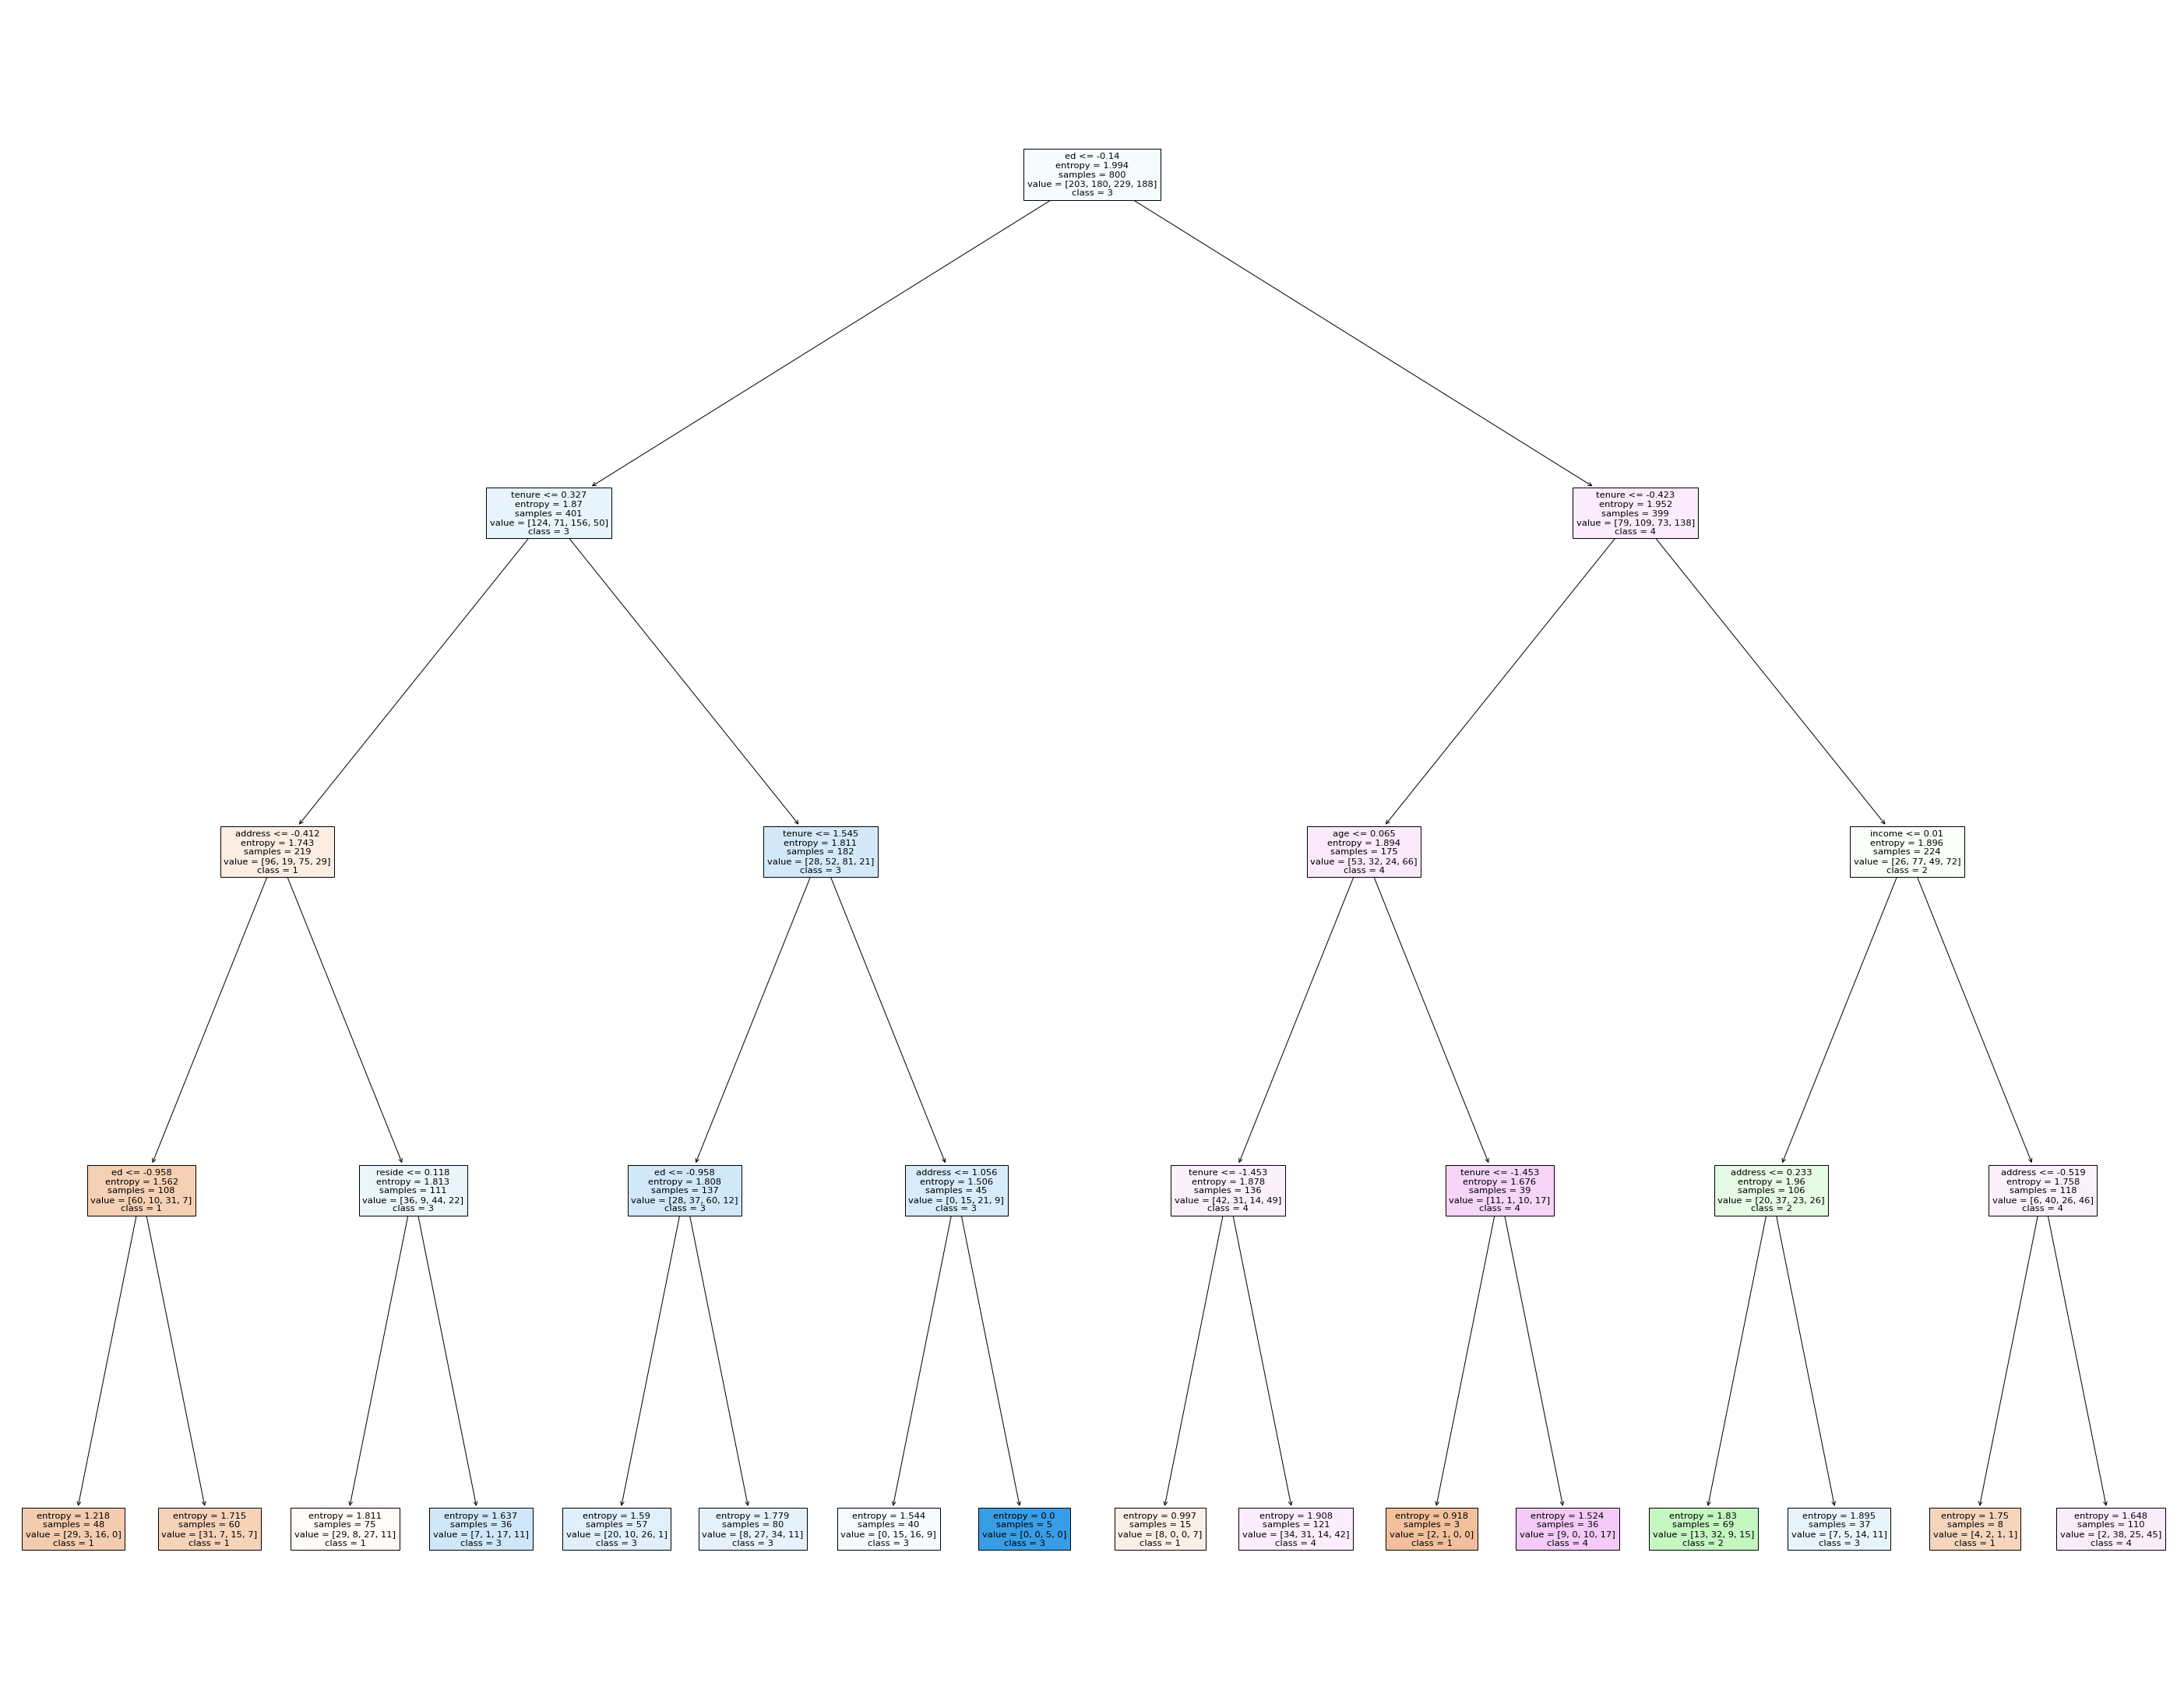

In [ ]:
featureNames = df.columns[0:11]
targetNames = ["1","2","3","4"]
fig = plt.figure(figsize=(50,40))
tree_plot = tree.plot_tree(decTree, 
                   feature_names=featureNames,  
                   class_names=targetNames,
                   filled=True)

#### Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_test, yhat)

In [ ]:
accuracy

0.405

In [ ]:
#For various depths
max_depth = 8
accuracies = np.zeros(5)
for i in range(4,max_depth+1):
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth = i).fit(X_train, y_train)
    yhat = decTree.predict(X_test)
    accuracies[i-4] = metrics.accuracy_score(y_test, yhat)
accuracies

array([0.405, 0.355, 0.42 , 0.425, 0.38 ])

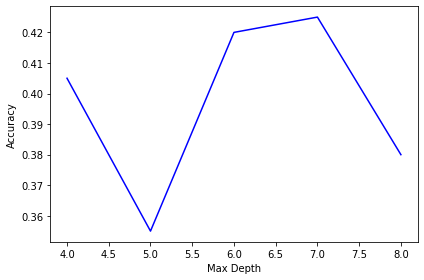

In [ ]:
plt.plot(range(4,9), accuracies, 'blue')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()

So we see max depth of 6 gives best accuracy 0.425

In [ ]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train, y_train)
yhat = decTree.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, yhat)
dt_accuracy

0.43

In [ ]:
#decision tree using criterion gini
max_depth = 8
accuracies = np.zeros(5)
for i in range(4,max_depth+1):
    decTree = DecisionTreeClassifier(criterion="gini", max_depth = i).fit(X_train, y_train)
    yhat = decTree.predict(X_test)
    accuracies[i-4] = metrics.accuracy_score(y_test, yhat)
max(accuracies)

0.45

The criterion change didn't give a very big difference in accuracy.

#### Precision and Recall

In [ ]:
precision = metrics.precision_score(y_test, yhat, average = None)
precision

array([0.51351351, 0.28571429, 0.40740741, 0.31081081])

In [ ]:
recall = metrics.recall_score(y_test, yhat, average = None)
recall

array([0.3015873 , 0.27027027, 0.42307692, 0.47916667])

In [ ]:
confusion_mat = metrics.confusion_matrix(y_test,yhat)
confusion_mat

array([[19,  5, 14, 25],
       [ 5, 10, 10, 12],
       [ 6, 10, 22, 14],
       [ 7, 10,  8, 23]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


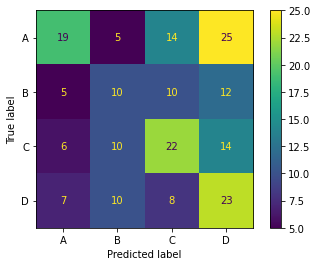

In [ ]:
metrics.plot_confusion_matrix(decTree, X_test, y_test)

### SVM
#### Model

In [ ]:
svm_clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [ ]:
yhat = svm_clf.predict(X_test)
yhat[0:10]

array(['B', 'A', 'B', 'D', 'C', 'C', 'A', 'C', 'A', 'C'], dtype=object)

#### Accuracy

In [ ]:
svm_accuracy = metrics.accuracy_score(y_test, yhat)
svm_accuracy

0.42

#### Precision and Recall

In [ ]:
precision = metrics.precision_score(y_test, yhat, average = None)
precision

array([0.50769231, 0.32258065, 0.44642857, 0.33333333])

In [ ]:
recall = metrics.recall_score(y_test, yhat, average = None)
recall

array([0.52380952, 0.27027027, 0.48076923, 0.33333333])

In [ ]:
#different values of C
accuracies = np.zeros(10)
for i in range(1,11):
   svm_clf = svm.SVC(C = i*0.1, kernel='rbf').fit(X_train, y_train)
   yhat = svm_clf.predict(X_test)
   accuracies[i-1] = metrics.accuracy_score(y_test, yhat)
accuracies

array([0.425, 0.44 , 0.43 , 0.435, 0.415, 0.43 , 0.425, 0.415, 0.415,
       0.42 ])

The accuracy is highest with C = 0.2, with accuracy of 0.44

#### Confusion Matrix

In [ ]:
confusion_mat = metrics.confusion_matrix(y_test,yhat)
confusion_mat

array([[33,  1, 13, 16],
       [ 6, 10, 12,  9],
       [15,  5, 25,  7],
       [11, 15,  6, 16]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


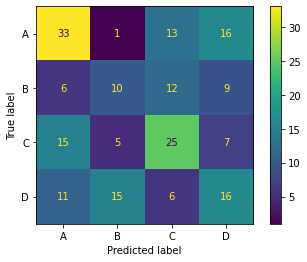

In [ ]:
metrics.plot_confusion_matrix(svm_clf,X_test,y_test)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
X_new = SelectKBest(k=6).fit_transform(X,y)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split( X_new, y, test_size=0.2, random_state=10)

#### KNN

In [ ]:
max_k = 40
accuracies = np.zeros((max_k - 3))
for n in range(3,max_k):    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_new,y_train_new)
    yhat_new=neigh.predict(X_test_new)
    accuracies[n-3] = metrics.accuracy_score(y_test_new, yhat_new)
max(accuracies)

0.44

#### Logistic Regression

In [ ]:
LR = LogisticRegression(C = 0.2).fit(X_train_new, y_train_new)
yhat_new = LR.predict(X_test_new)
accuracy = metrics.accuracy_score(y_test_new, yhat_new)
accuracy

0.43

#### Decision Tree

In [ ]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train_new, y_train_new)
yhat_new = decTree.predict(X_test_new)
accuracy = metrics.accuracy_score(y_test_new, yhat_new)
accuracy

0.38

#### SVM

In [ ]:
svm_clf = svm.SVC(C = 0.3, kernel='rbf').fit(X_train_new, y_train_new)
yhat_new = svm_clf.predict(X_test_new)
accuracy = metrics.accuracy_score(y_test_new, yhat_new)
accuracy

0.425

After choosing different values of best k features, we got 6 is the best, but still it doesn't increase our accuracy.

### Choosing a Model

In [ ]:
print("The various accuracies are:")
print("KNN - ", knn_accuracy)
print("Logistic Regression - ", LR_accuracy)
print("Decision Tree - ", dt_accuracy)
print("SVM - ", svm_accuracy)

The various accuracies are:
KNN -  0.46
Logistic Regression -  0.455
Decision Tree -  0.425
SVM -  0.42


As we can see here, all the accuracies are very similar. The lowest is Decision Tree with 0.425 and the highest is KNN with 0.46. From this we really can't say one model is much better than the other. For this data we can use any of these four models.

One thing to notice from all the classifiers is that the class 1 of customers always had the most number of true positves. This indicates that basic service users are more easily classfiable than the other types of service users.

The four categories of customers cannot be classified very well based on the given input parameters. We will need a different parameter which clearly splits up the four categories or we need more data.